# Project Name: Bank Customer Churn Prediction using H2O Auto ML

 
### 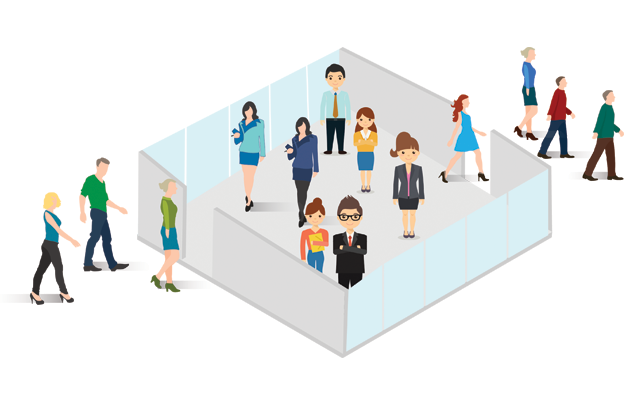

## Context: 
### In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim:
### We aim to accomplist the following for this study:

- Identify and visualize which factors contribute to customer churn:

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## We will be using ANN models and H2O Auto ML in this project

## Time Line of the Project:
- Data Analysis
- Feature Engineering
- Model Building using ANN 
- Model Building and Prediction using H2O Auto ML

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Bank-Customer-Churn-Auto-Keras/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#Data Analysis

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## We will plot a Pie Chart 

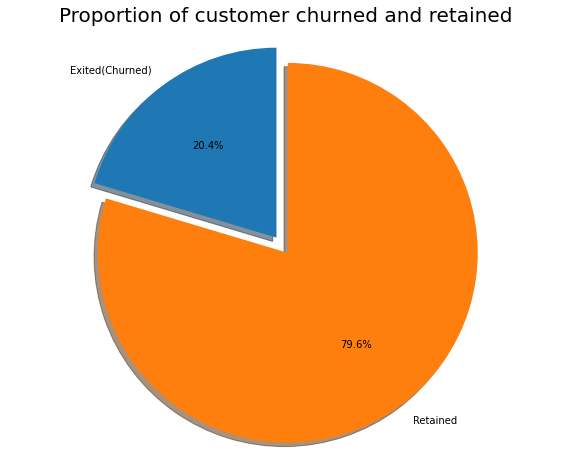

In [11]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [12]:
import seaborn as sns

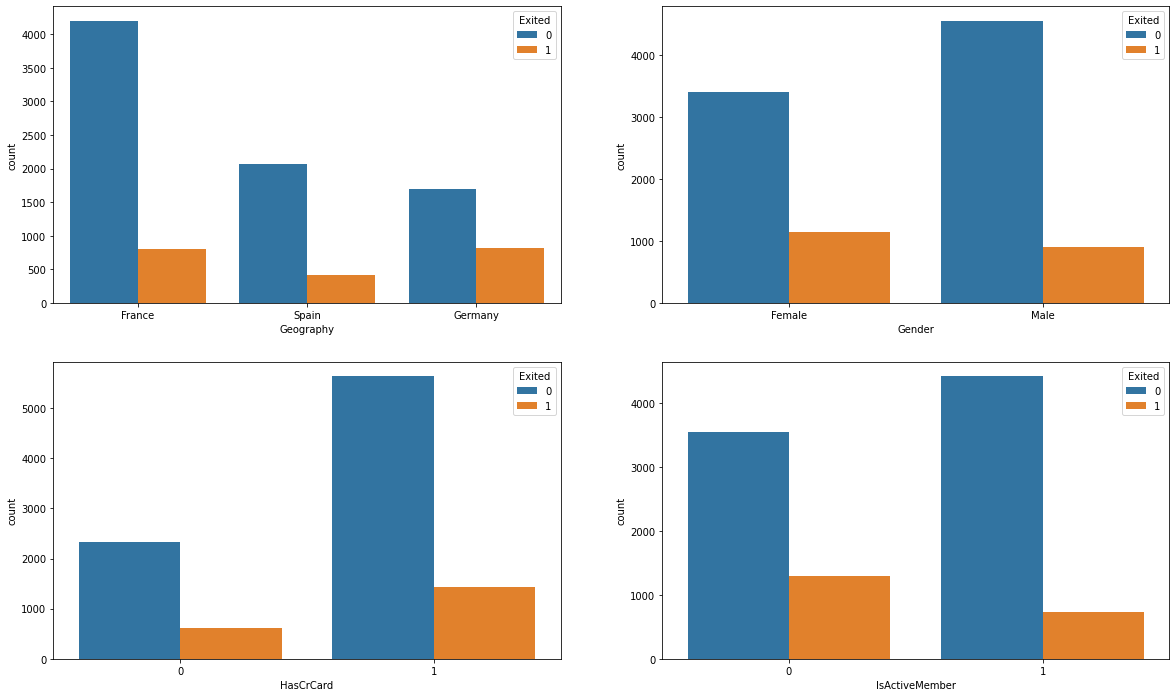

In [13]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

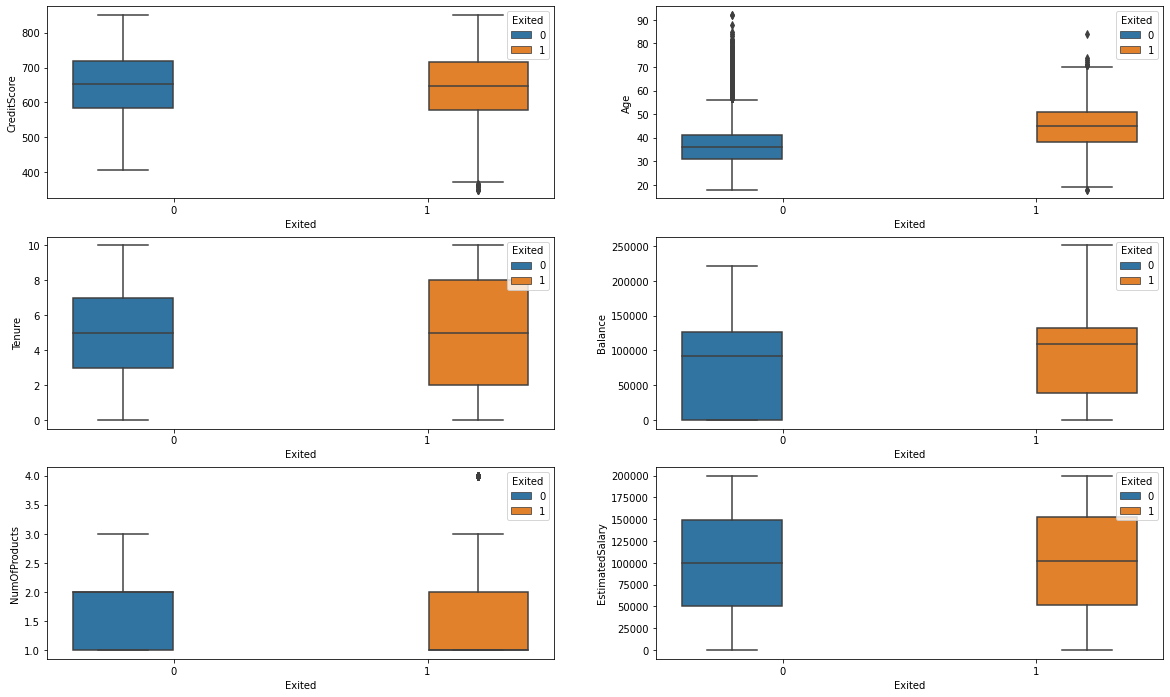

In [14]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


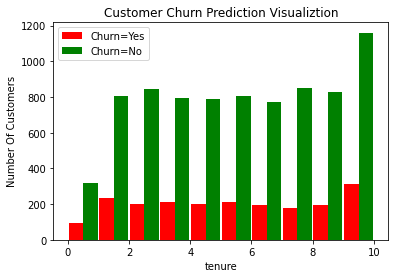

In [15]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Feature Engineering

### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

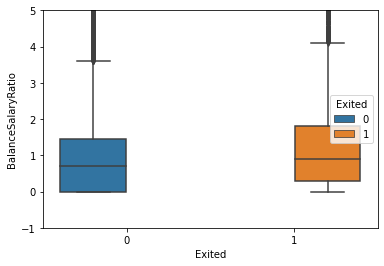

In [16]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

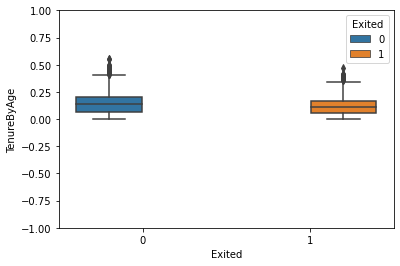

In [17]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

#### Printing the categorical variables

In [18]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [19]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [39]:
dataset = pd.read_csv("/content/drive/MyDrive/Bank-Customer-Churn-Auto-Keras/Churn_Modelling.csv")
# Exclude first 3 columns and the last column, because they are not useful.
# Index starts at 0.
x = dataset.iloc[:, 3:-1].values

# Just get the last column of dataset for the dependent variable.
y = dataset.iloc[:, -1].values

In [40]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Get all the rwos for the 2 column and encode them.
x[:, 2] = le.fit_transform(x[:, 2])

### One Hot Encoding method

In [42]:
# We do one hot coding for geographical places because they have no relation among themselves like gender did.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [43]:
print (x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [45]:
# pply feature scaling to all the features of both the training and the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling fitted only to training set to avoid information leakage.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building and Prediction

## The Sequential model

### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

## A Sequential model is not appropriate when:

-Your model has multiple inputs or multiple outputs
-Any of your layers has multiple inputs or multiple outputs
-You need to do layer sharing
-You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [46]:
# Create a var to represtn the ANN as an instance of the sequential class that initializes our ANN.
ann = tf.keras.models.Sequential()
# add() method belongs to the sequential class.
# add a fully connected layer (hidden), which will be a new object for the dense class.
# Argument for dense() - 
# 'units' - There are called hyperparameters and are the hidden neurons.
# 'activation' - activation function in the hidden layer must be a rectifier activation function.
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) # 'relu' - codename for rectifier activation function.
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 
# As the output layer is binary we only need one neuron to match with the output layer, so 'units' = 1
# We need a sigmoid activation function, because it will give the predictions, as well as the probabilities.
# If we were predicting a categorical variable, activation = 'sigmax'
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

In [47]:
# Arguments - 
# 'optimizer' - We choose 'adam' optimizer as it can perform stochastic gradient descent. 
#  The stochastic gradient descent will optimize the weights to minimize the loss between the actual and the predicted values.
# 'loss' - When we are doing a binary classification when we are predicting a binary variable use 'binary_crossentropy' and 
#  if we had categorical variable to predict we would have used 'categorical_crossentropy'
# 'metrics' - 
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
# Batch learning, default batch size to be compared to the actual results = 32
ann.fit(X_train, y_train, batch_size=32, epochs=100)
# As we can see the accuracy converges around 0.86 around epoch = 20, so we didn't need 100 epochs.

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6306 - accuracy: 0.7084
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8010
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8198
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8305
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8397
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8445
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8461
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8493
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3614 - accura

Predicting the result of a single observation

Using this ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer?

Solution

In [50]:
# As we used a sigmoid function, we get the probability of this person leaving the bank.
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

[[0.02857479]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1**: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2**: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

In [51]:
# These are predicted probabilities
y_predicted = ann.predict(X_test)
# Convert Predicted probabilities into binary outcome
y_predicted = (y_predicted > 0.5)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Checking the accuracy 

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
print(cm)
accuracy_score(y_test, y_predicted)

[[1544   41]
 [ 221  194]]


0.869

In [53]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.83      0.47      0.60       415

    accuracy                           0.87      2000
   macro avg       0.85      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



Text(69.0, 0.5, 'Truth')

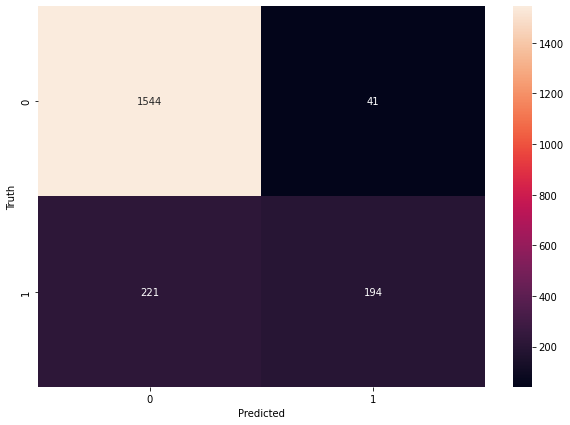

In [54]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
print("Accuracy score is: ", accuracy_score(y_test,y_predicted)*100,"%")

Accuracy score is:  86.9 %


Therefore, Accuracy = 87%

Total correct predictions that customers stay in bank = 1541

Total correct predictions that customers leave the bank = 185

Total incorrect predictions that customers stay in the bank = 230

Total incorrect predictions that customers leave in the bank = 44

# Using Auto ML

#**H2O Auto ML**

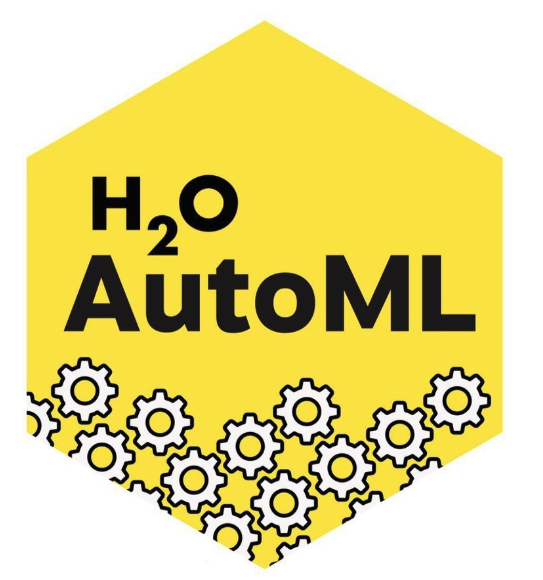

### H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

### Installing H2O Auto ML

In [58]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [59]:
!pip install h2o

     |████████████████████████████████| 176.0 MB 6.7 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=800f234a8ab4124c586ca00857606c0ad57f74eaf8f7a432a8dcb07093c1a210
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


## Importing the h2o Python module and H2OAutoML class

In [60]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps8geb41g
  JVM stdout: /tmp/tmps8geb41g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps8geb41g/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_1r0n0o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Loading the data

In [61]:
df = h2o.import_file("/content/drive/MyDrive/Bank-Customer-Churn-Auto-Keras/Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [62]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


## H2O auto ml can do all the data preprocessing techniques

In [63]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [64]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0
13,1.56323e+07,Kay,476,France,Female,34,10,0,2,1,0,26261,0
14,1.56915e+07,Chin,549,France,Female,25,5,0,2,0,0,190858,0
15,1.56009e+07,Scott,635,Spain,Female,35,7,0,2,1,1,65951.6,0
16,1.5644e+07,Goforth,616,Germany,Male,45,3,143129,2,0,1,64327.3,0


In [65]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

### Defining the model

In [66]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [67]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
14:21:42.432: Project: AutoML_1_20220206_142142
14:21:42.439: Setting stopping tolerance adaptively based on the training frame: 0.01117126691752633
14:21:42.440: Build control seed: 10
14:21:42.442: training frame: Frame key: AutoML_1_20220206_142142_training_py_3_sid_9ca1    cols: 14    rows: 8013  chunks: 8    size: 430392  checksum: 3538691586445155582
14:21:42.442: validation frame: NULL
14:21:42.443: leaderboard frame: NULL
14:21:42.444: blending frame: NULL
14:21:42.448: response column: Exited
14:21:42.449: fold column: null
14:21:42.449: weights column: null
14:21:42.477: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_

### Seeing the Leaderboard

In [68]:
lb = aml.leaderboard

In [69]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_2_AutoML_1_20220206_142142,0.103884,0.32231,0.103884,0.211475,0.226923
StackedEnsemble_AllModels_5_AutoML_1_20220206_142142,0.104011,0.322508,0.104011,0.212365,0.226869
StackedEnsemble_AllModels_1_AutoML_1_20220206_142142,0.104103,0.322649,0.104103,0.211471,0.227205
StackedEnsemble_BestOfFamily_6_AutoML_1_20220206_142142,0.104279,0.322922,0.104279,0.214142,0.227367
StackedEnsemble_BestOfFamily_3_AutoML_1_20220206_142142,0.104316,0.322979,0.104316,0.213583,0.227512
StackedEnsemble_BestOfFamily_2_AutoML_1_20220206_142142,0.104748,0.323647,0.104748,0.214224,0.228147
GBM_1_AutoML_1_20220206_142142,0.104864,0.323827,0.104864,0.21683,0.22802
StackedEnsemble_BestOfFamily_1_AutoML_1_20220206_142142,0.104907,0.323894,0.104907,0.215692,0.228363
GBM_2_AutoML_1_20220206_142142,0.105172,0.324302,0.105172,0.212429,0.22776
StackedEnsemble_BestOfFamily_5_AutoML_1_20220206_142142,0.106586,0.326475,0.106586,0.20664,0.22901


## Getting all the model ids

In [70]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [71]:
model_ids

['StackedEnsemble_AllModels_2_AutoML_1_20220206_142142',
 'StackedEnsemble_AllModels_5_AutoML_1_20220206_142142',
 'StackedEnsemble_AllModels_1_AutoML_1_20220206_142142',
 'StackedEnsemble_BestOfFamily_6_AutoML_1_20220206_142142',
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20220206_142142',
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20220206_142142',
 'GBM_1_AutoML_1_20220206_142142',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220206_142142',
 'GBM_2_AutoML_1_20220206_142142',
 'StackedEnsemble_BestOfFamily_5_AutoML_1_20220206_142142',
 'StackedEnsemble_AllModels_4_AutoML_1_20220206_142142',
 'GBM_3_AutoML_1_20220206_142142',
 'GBM_4_AutoML_1_20220206_142142',
 'XGBoost_3_AutoML_1_20220206_142142',
 'DRF_1_AutoML_1_20220206_142142',
 'XRT_1_AutoML_1_20220206_142142',
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220206_142142',
 'StackedEnsemble_AllModels_3_AutoML_1_20220206_142142',
 'XGBoost_2_AutoML_1_20220206_142142',
 'XGBoost_1_AutoML_1_20220206_142142',
 'GLM_1_AutoML_1_20220206_14

In [72]:
aml.leader.model_performance(df_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.10364579921457867
RMSE: 0.32194067654550684
MAE: 0.20867508086927353
RMSLE: 0.22569039504741026
R^2: 0.3693772053641178
Mean Residual Deviance: 0.10364579921457867
Null degrees of freedom: 1986
Residual degrees of freedom: 1982
Null deviance: 326.6139002188338
Residual deviance: 205.9442030393678
AIC: 1146.777879591926


### Getting the model details for best performing model

In [73]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20220206_142142

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08259089903300153
RMSE: 0.28738632367077166
MAE: 0.18623231599541412
RMSLE: 0.20065321741488418
R^2: 0.48913728597149475
Mean Residual Deviance: 0.08259089903300153
Null degrees of freedom: 8012
Residual degrees of freedom: 8008
Null deviance: 1295.4573817546434
Residual deviance: 661.8008739514412
AIC: 2768.6425221306517

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10388379048219194
RMSE: 0.32231008436316716
MAE: 0.21147485680922967
RMSLE: 0.22692336559625512
R^2: 0.35743095461286345
Mean Residual Deviance: 0.10388379048219194
Null degrees of freedom: 8012
Residual degrees of freedom: 8008
Null deviance: 1295.576842284676
Residual deviance: 832.420813133804
AIC: 4606.611431437412


In [74]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_1_AutoML_1_20220206_142142',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_1_20220206_142142',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_1_20220206_142142',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_4_AutoML_1_20220206_142142',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_3_AutoML

In [76]:
#output.varimp_plot()

In [77]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20220206_142142

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08259089903300153
RMSE: 0.28738632367077166
MAE: 0.18623231599541412
RMSLE: 0.20065321741488418
R^2: 0.48913728597149475
Mean Residual Deviance: 0.08259089903300153
Null degrees of freedom: 8012
Residual degrees of freedom: 8008
Null deviance: 1295.4573817546434
Residual deviance: 661.8008739514412
AIC: 2768.6425221306517

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10388379048219194
RMSE: 0.32231008436316716
MAE: 0.21147485680922967
RMSLE: 0.22692336559625512
R^2: 0.35743095461286345
Mean Residual Deviance: 0.10388379048219194
Null degrees of freedom: 8012
Residual degrees of freedom: 8008
Null deviance: 1295.576842284676
Residual deviance: 832.420813133804
AIC: 4606.611431437412


In [78]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [79]:
y_pred

predict
0.308345
0.085322
0.0406627
0.121738
0.0473879
0.0187937
1.06298
0.199351
0.200116
0.131283
